In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Iris.csv");
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Iris.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

import seaborn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split instead of model_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
dataset = pandas.read_csv("/content/Iris.csv")
print(dataset.head(5))
print(dataset.shape)
print(dataset.describe())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.3000

In [ ]:
dataset = dataset.drop('Id',axis=1)
print(dataset.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

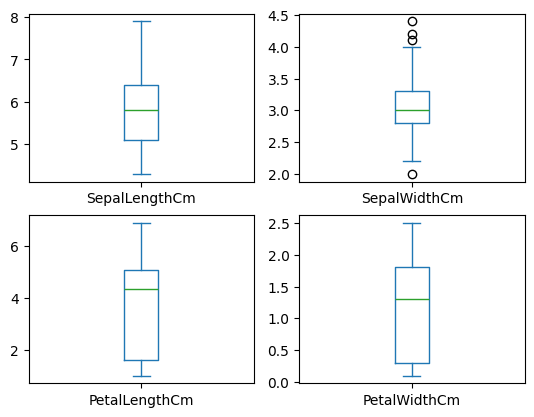

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


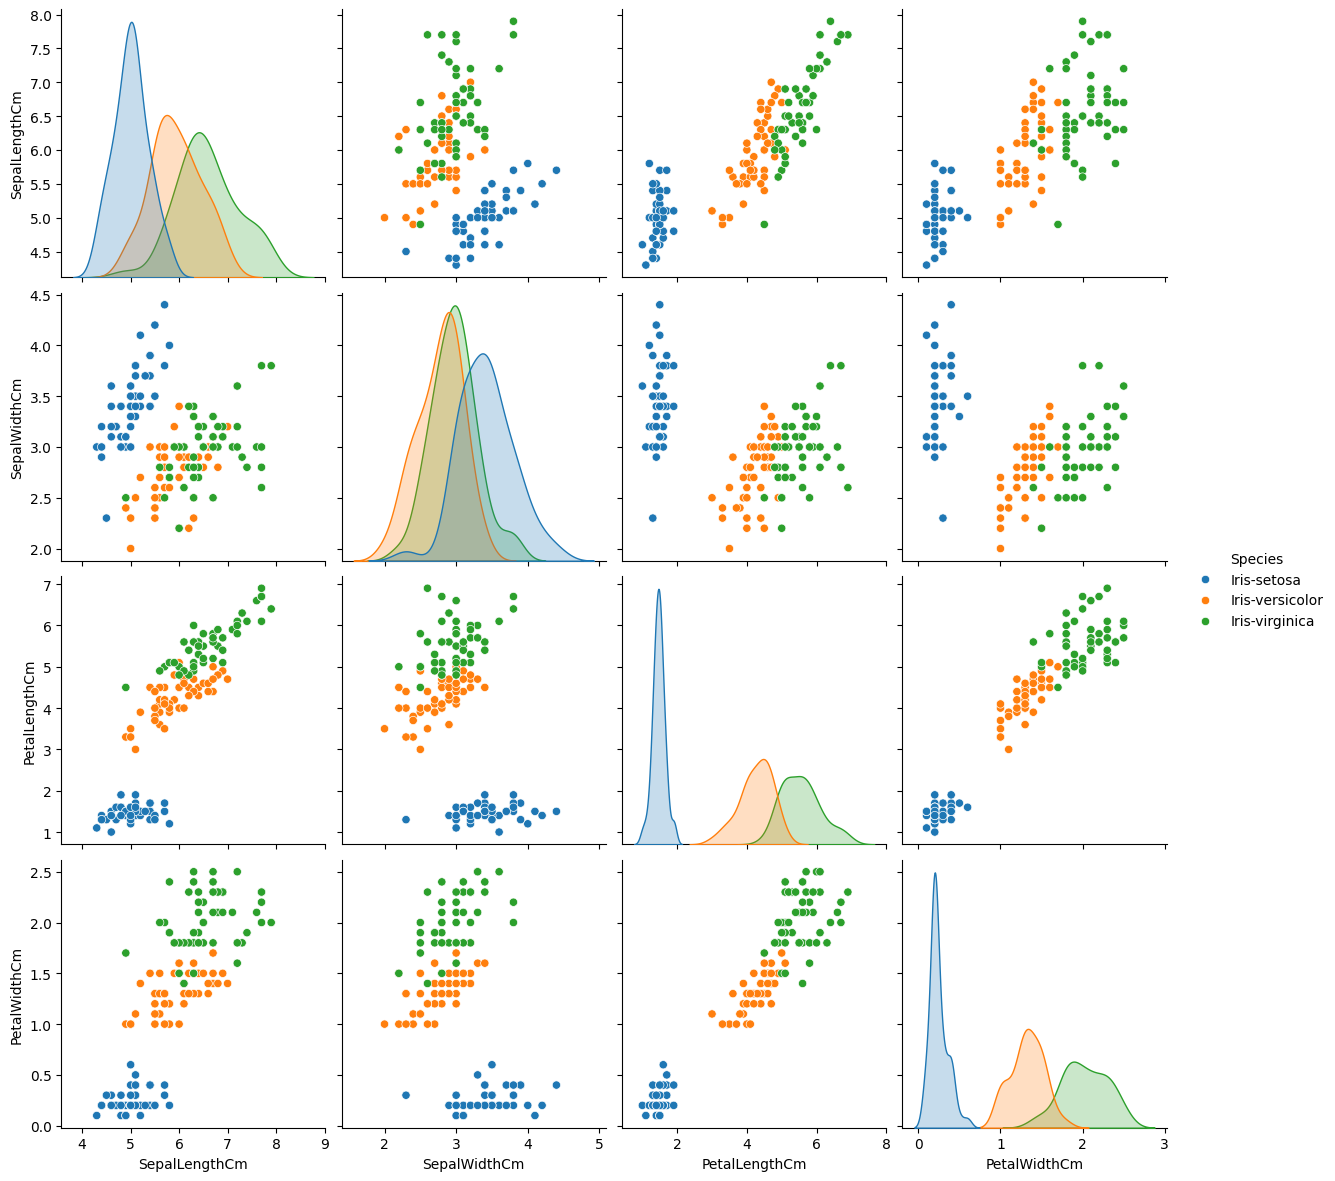

In [ ]:
seaborn.pairplot(dataset, hue="Species", size=3, diag_kind="kde")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


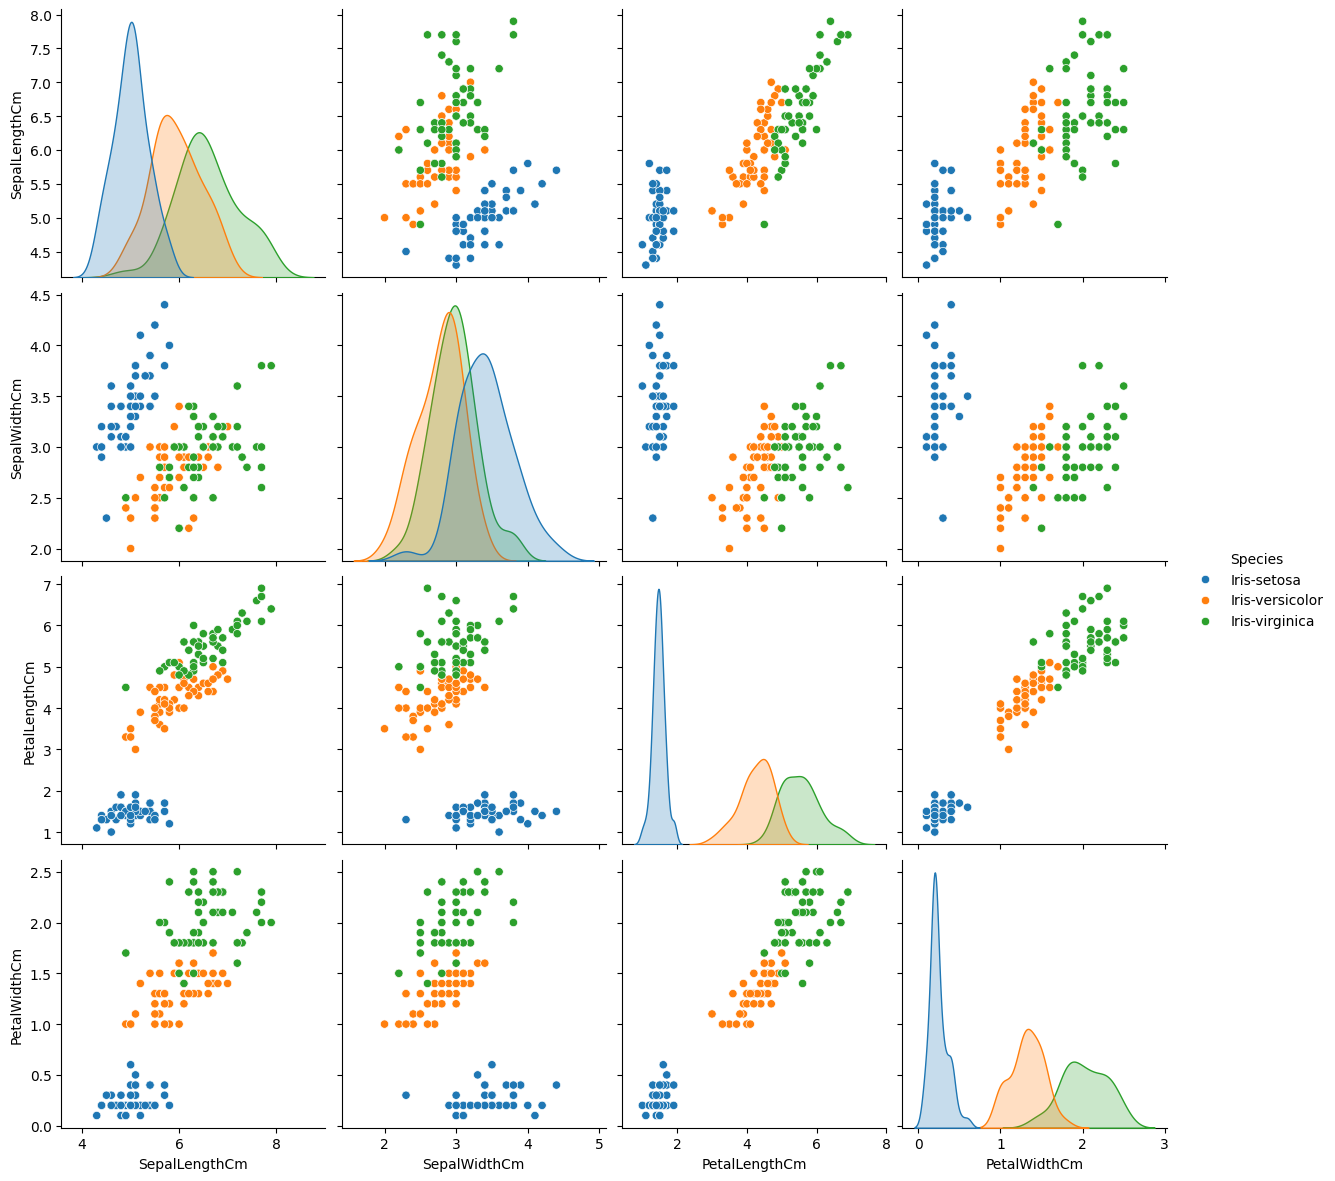

In [ ]:
seaborn.pairplot(dataset, hue="Species", size = 3)
seaborn.set()

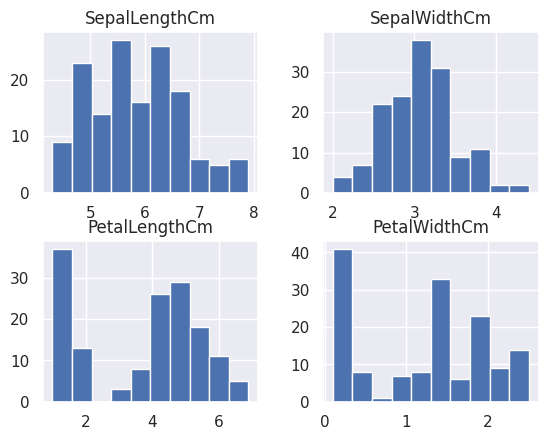

In [ ]:
dataset.hist()
plt.show()

In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


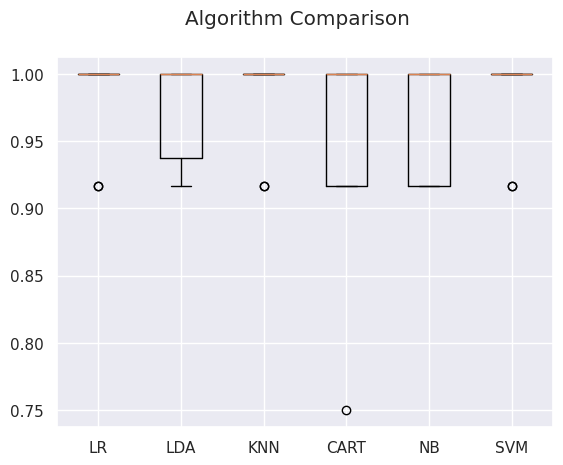

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
X_new = numpy.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

prediction = svn.predict(X_new)

print("Prediction of Species: {}".format(prediction))

X_new.shape: (2, 4)
Prediction of Species: ['Iris-versicolor' 'Iris-setosa']


In [ ]:
# prompt: please give me the write code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the dataset.  Replace '/Iris.csv' with the correct path if needed.
try:
    dataset = pd.read_csv("/Iris.csv")
except FileNotFoundError:
    print("Error: Iris.csv not found. Please ensure the file is in the correct location.")
    exit()


# Display some initial information
print(dataset.head())
print(dataset.shape)
print(dataset.describe())

# Data cleaning (remove 'Id' column and check for nulls/duplicates)
dataset = dataset.drop('Id', axis=1)
print(dataset.isnull().sum())
print(dataset.duplicated().sum())
# Optionally handle duplicates if necessary (e.g., dataset.drop_duplicates(inplace=True))


# Data visualization
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
sns.pairplot(dataset, hue="Species", size=3, diag_kind="kde")
plt.show()
dataset.hist()
plt.show()


# Prepare data for modeling
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7)

# Model evaluation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

# Boxplot algorithm comparison
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names) # Use range(1, len(names) + 1) for correct xticks
plt.title('Algorithm Comparison')
plt.show()

# Make predictions with SVM
svm = SVC() #Renamed from svn to svm
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(f"Accuracy: {accuracy_score(Y_validation, predictions):.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_validation, predictions)}")
print(f"Classification Report:\n{classification_report(Y_validation, predictions)}")


# Example new data prediction
X_new = np.array([[3, 2, 4, 0.2], [4.7, 3, 1.3, 0.2]])
print(f"X_new.shape: {X_new.shape}")
prediction = svm.predict(X_new)
print(f"Prediction of Species: {prediction}")


Error: Iris.csv not found. Please ensure the file is in the correct location.
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
(150, 5)
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3

KeyError: "['Id'] not found in axis"

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.3000

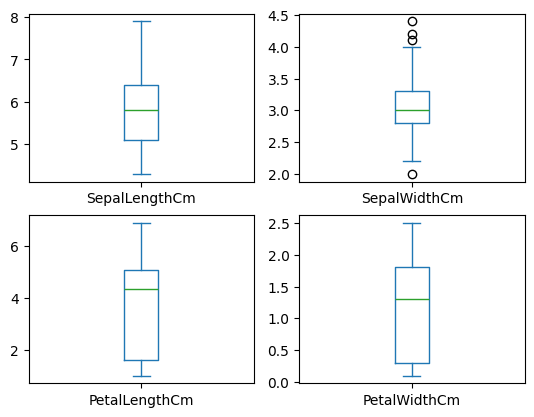

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


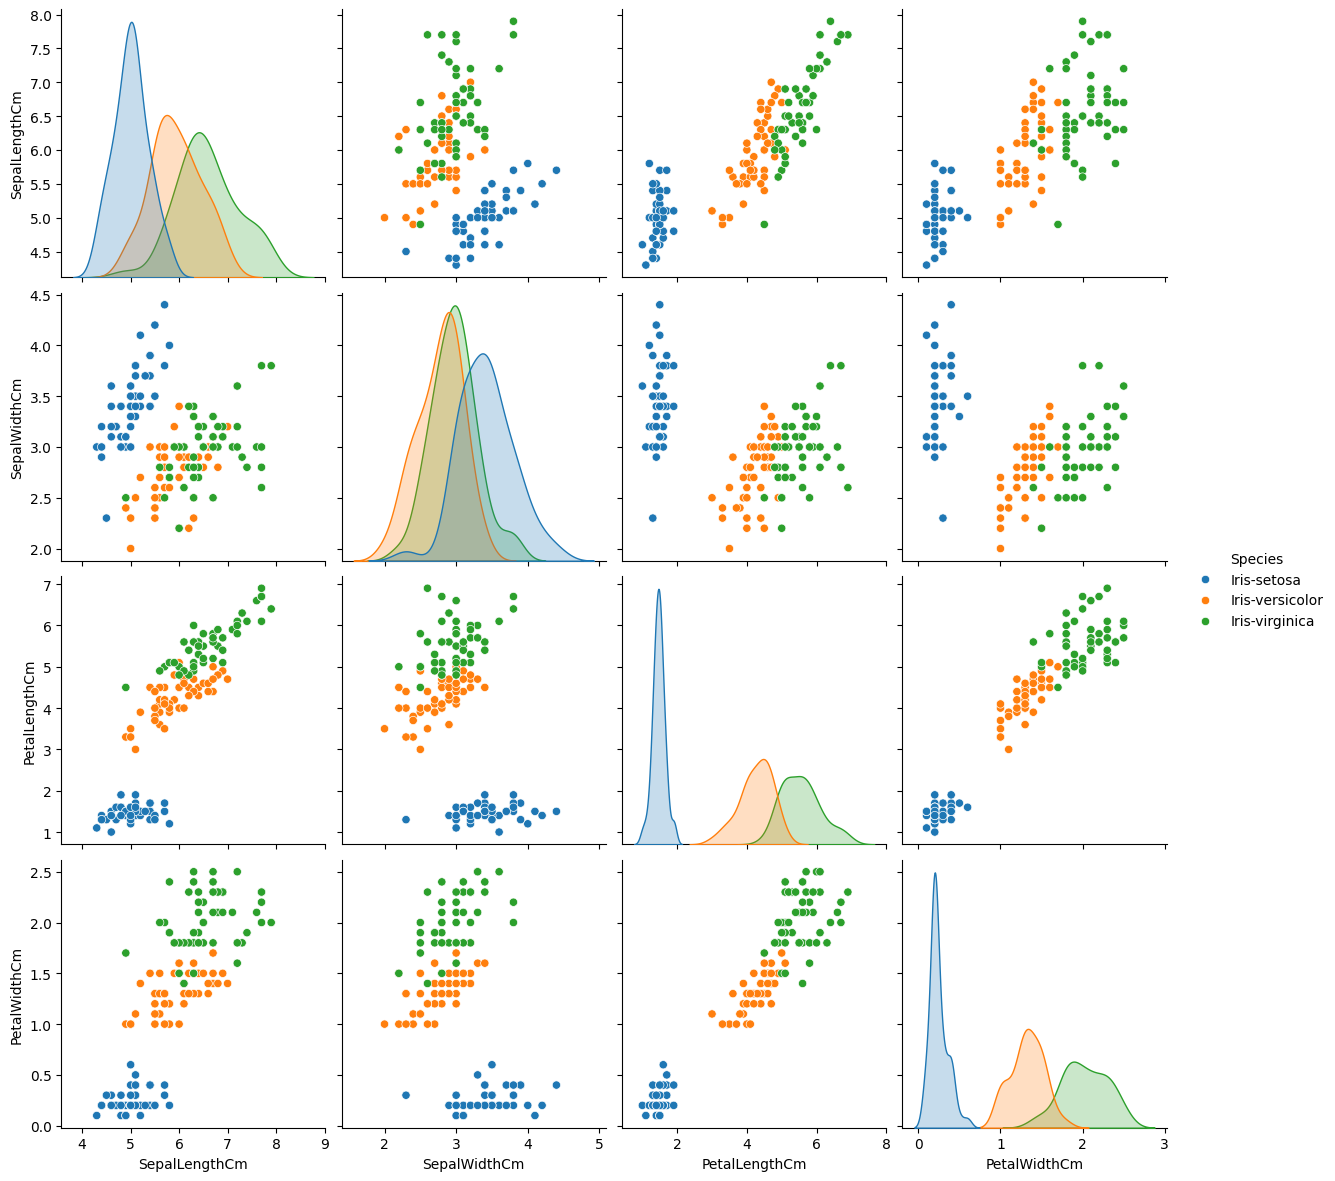

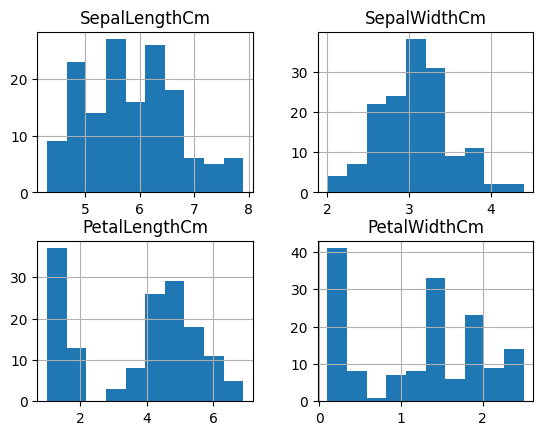

LR: 0.983 (0.033)
LDA: 0.975 (0.038)
KNN: 0.983 (0.033)
CART: 0.950 (0.076)
NB: 0.967 (0.041)
SVM: 0.983 (0.033)


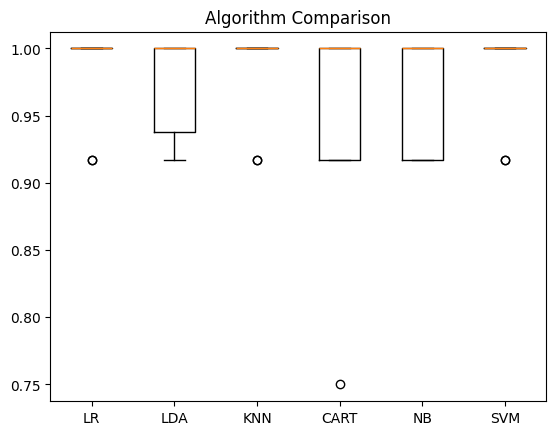

Accuracy: 0.867
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

X_new.shape: (2, 4)
Prediction of Species: ['Iris-versicolor' 'Iris-setosa']


In [ ]:
# prompt: please give me the write code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the dataset.  Replace '/Iris.csv' with the correct path if needed.
try:
    dataset = pd.read_csv("/content/Iris.csv") # Changed the file path to "/content/Iris.csv"
except FileNotFoundError:
    print("Error: Iris.csv not found. Please ensure the file is in the correct location.")
    exit()


# Display some initial information
print(dataset.head())
print(dataset.shape)
print(dataset.describe())

# Data cleaning (remove 'Id' column and check for nulls/duplicates)
# Check if 'Id' column exists before dropping
if 'Id' in dataset.columns:  # Check if 'Id' column exists
    dataset = dataset.drop('Id', axis=1)
else:
    print("Warning: 'Id' column not found in the dataset.") # Print a warning if 'Id' column is not found

print(dataset.isnull().sum())
print(dataset.duplicated().sum())
# Optionally handle duplicates if necessary (e.g., dataset.drop_duplicates(inplace=True))


# Data visualization
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
sns.pairplot(dataset, hue="Species", size=3, diag_kind="kde")
plt.show()
dataset.hist()
plt.show()


# Prepare data for modeling
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7)

# Model evaluation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

# Boxplot algorithm comparison
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names) # Use range(1, len(names) + 1) for correct xticks
plt.title('Algorithm Comparison')
plt.show()

# Make predictions with SVM
svm = SVC() #Renamed from svn to svm
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(f"Accuracy: {accuracy_score(Y_validation, predictions):.3f}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_validation, predictions)}")
print(f"Classification Report:\n{classification_report(Y_validation, predictions)}")


# Example new data prediction
X_new = np.array([[3, 2, 4, 0.2], [4.7, 3, 1.3, 0.2]])
print(f"X_new.shape: {X_new.shape}")
prediction = svm.predict(X_new)
print(f"Prediction of Species: {prediction}")